## Exploring Matplotlib
**[github.com/owen-rote](https://github.com/owen-rote)** \
**Purpose:** This notebook demonstrates basic functionalities of Matplotlib, like simple graphs and styling, and more advanced functionalities utilizing NumPy and Pandas to plot real-world data from CSV files.

## Followed: [Tutorial by freeCodeCamp.org on Youtube](https://www.youtube.com/watch?v=3Xc3CA655Y4)

### Load Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Basic Graph

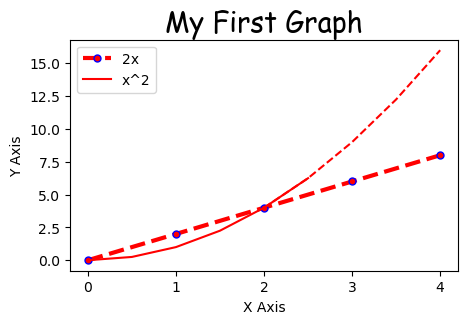

In [2]:
x = [0, 1, 2, 3, 4]
y = [0, 2, 4, 6, 8]

# Resize graph
#             relative size    px per sq inch                    
plt.figure(figsize=(5, 3), dpi=100)

## Line 2
plt.plot(x, y, label='2x', color='red', linewidth=3, marker='.', 
         markersize=10, markeredgecolor='blue', linestyle='--')

# Shorthand method for quick formatting
#plt.plot(x, y, 'r.--', label='2x')

## Line 2
x2 = np.arange(0, 4.5, 0.5)
#          [:6] takes first six elements
plt.plot(x2[:6], x2[:6]**2, 'r', label='x^2')
#          [4:] is 4 onward
plt.plot(x2[4:], x2[4:]**2, 'r--')

# Labels
plt.title('My First Graph', fontdict={'fontname': 'Comic Sans MS', 'fontsize': 20})
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Tick incremenets
plt.xticks([0, 1, 2, 3, 4])
#plt.yticks([0, 2, 4, 6, 8, 10])

# Legend
plt.legend()

# Saving
plt.savefig('mygraph.png', dpi=300) # Can pass higher dpi for the sake of saving

# Gets rid of the message with memory address and instead simply shows
plt.show()

### Bar Charts

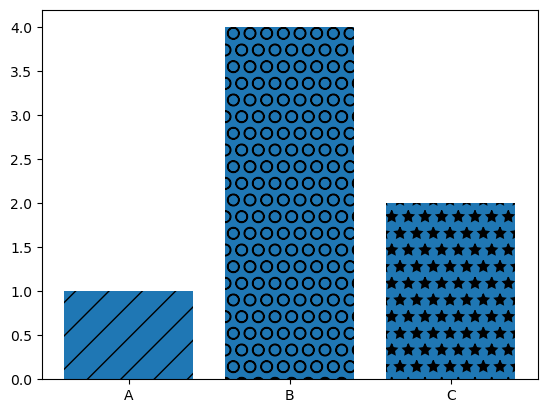

<Figure size 600x400 with 0 Axes>

In [3]:
labels = ['A', 'B', 'C']
values = [1, 4, 2]

bars = plt.bar(labels, values)

# Set hatch (pattern)
bars[0].set_hatch('/')
bars[1].set_hatch('O')
bars[2].set_hatch('*')
# Shorthand method:
# patterns = ['/', 'O', '*']
# for bar in bars:
#     bar.set_hatch(patterns.pop(0))

plt.figure(figsize=(6, 4))

plt.show()

# Real World Examples

### Gas Price Line Graph

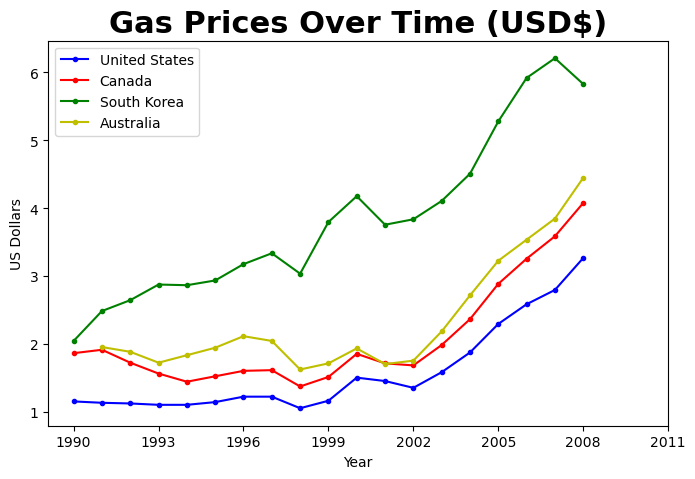

In [4]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(8, 5))

plt.title('Gas Prices Over Time (USD$)', fontdict={'fontweight':'bold', 'fontsize':22})

#                   blue, dot markers, straight line
plt.plot(gas.Year, gas.USA, 'b.-',               label='United States')
plt.plot(gas['Year'], gas.Canada, 'r.-',         label='Canada')
plt.plot(gas['Year'], gas['South Korea'], 'g.-', label='South Korea')
plt.plot(gas['Year'], gas['Australia'], 'y.-',   label='Australia')

# Method to plot every country
# for country in gas:
#     if country != 'Year':
#         plt.plot(gas.Year, gas[country], marker='.')

# Iterates and takes every 3 years
plt.xticks(gas.Year[::3].tolist()+[2011])

plt.xlabel('Year')
plt.ylabel('US Dollars')

plt.legend()

plt.savefig('Gas Price Figure.png', dpi=300)
plt.show()

### Fifa Player Graphs

##### Load Fifa Data

In [5]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms

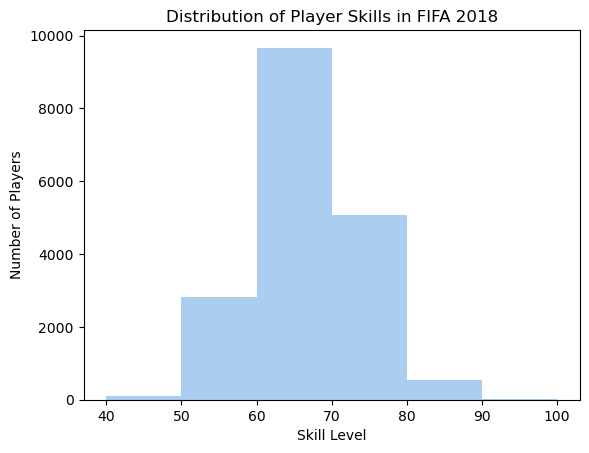

In [6]:
bins = np.arange(40, 101, 10)

plt.hist(fifa.Overall, bins=bins, color='#abcdef')

plt.xlabel('Skill Level')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Skills in FIFA 2018')

plt.xticks(bins)

plt.show()

### Pie Chart - Foot Preference

In [7]:
# Hide FutureWarning
import warnings
warnings.filterwarnings('ignore')

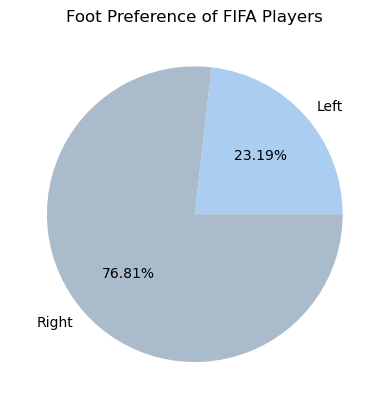

In [8]:
# Number of left footed players
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
# Number of right footed players
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbcc']

plt.pie([left, right], labels=labels, colors=colors, autopct='%.2f%%')

plt.title('Foot Preference of FIFA Players')

plt.show()

### Pie Chart - Player Weight

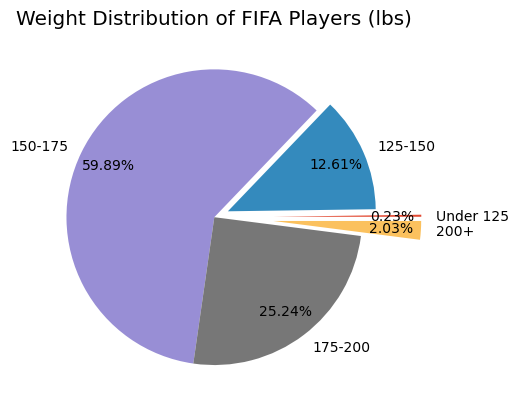

In [9]:
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

# Use different colorscheme
plt.style.use('ggplot')

# Get counts of players for each weightclass
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[fifa.Weight >= 200].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', '200+']

# Set how much to explode each value by
explode = (0.4, 0.1, 0, 0, 0.4)

plt.title('Weight Distribution of FIFA Players (lbs)')

plt.pie(weights, labels=labels, autopct='%.2f%%', pctdistance=0.8, explode=explode)
plt.show()

### Box Plot

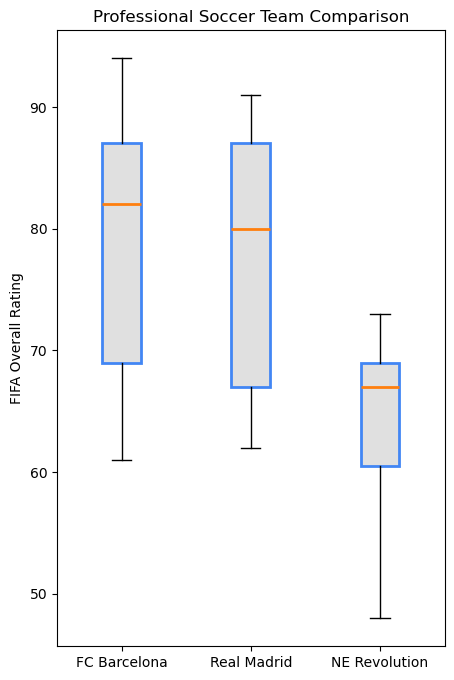

In [10]:
plt.style.use('default')

# Get lists of each team's players and their overall's
barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']

plt.figure(figsize=(5, 8))
labels = ['FC Barcelona', 'Real Madrid', 'NE Revolution']
plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')

# Generate Plot. patch_artist allows for facecolor
boxes = plt.boxplot([barcelona, madrid, revs], labels=labels, patch_artist=True, medianprops={'linewidth':2})

# Add style
for box in boxes['boxes']:
    # Set edge color
    box.set(color='#4286f4', linewidth=2)
    # Change fill color
    box.set(facecolor='#e0e0e0')

plt.show()